# DIGITAL INDIA Sentiment Analysis

## **1.DATA COLLECTION**

### Tweets mentioning about "DIGITAL INDIA"

In [21]:
import tweepy
import configparser
import pandas as pd

# read configs
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

keywords = 'Digital India'
limit=10000

tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=300, tweet_mode='extended').items(limit)

columns = ['user', 'tweets']
data_list = []

for tweet in tweets:
    data_list.append([tweet.user.screen_name, tweet.full_text])

data_ = pd.DataFrame(data_list, columns=columns)

print(data_)

                 user                                             tweets
0      laxman92889636  RT @sharon202363451: "ADS GROUP OF COMPANIES" ...
1           abhay_ads  "ADS GROUP OF COMPANIES" based at INDIA 🇮🇳. We...
2        PriestNeeraj  RT @ABVPVidarbha: Today,  G-20 Youth Perspecti...
3        SmartOwl1611  RT @ankitatIIMA: 💥Jinping's desperate 3 days v...
4      laxman92889636  RT @abhay_ads: "ADS GROUP OF COMPANIES" based ...
...               ...                                                ...
9995    NarendraProud  RT @Punasusang: India records over 23 billion ...
9996  RahulPa21862902  RT @KdSirra: @AshwiniVaishnaw @_DigitalIndia @...
9997   SanataniBatman  RT @ThePollLady: 1. Oxfam has released a repor...
9998        kundanst6  RT @melindagates: Honored to meet @nsitharaman...
9999   office_saurabh  RT @nrnjnbehera: PM Modi’s Digital India visio...

[10000 rows x 2 columns]


In [639]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = "(from:#DigitalIndia) until:2022-12-03 since:2015-08-03"
tweets = []
limit = 20000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

# to save to csv
df.to_csv('tweets.csv')

                           Date             User  \
0     2022-12-02 19:50:26+00:00    CongressOrBJP   
1     2022-12-02 19:49:14+00:00    CongressOrBJP   
2     2022-12-02 17:18:36+00:00     INDIAdrive21   
3     2022-12-02 14:55:01+00:00  indiamarketing_   
4     2022-12-02 11:30:00+00:00             HPCL   
...                         ...              ...   
19995 2018-11-18 08:06:21+00:00      mukeshdixit   
19996 2018-11-18 08:04:25+00:00           _AFPOH   
19997 2018-11-18 07:39:10+00:00       IndiaMixer   
19998 2018-11-18 06:49:11+00:00       HimaniMish   
19999 2018-11-18 06:25:28+00:00  SagarPo76994634   

                                                                                                                                                                                                                                                                                                                     Tweet  
0         AFPOH Startup Of Visionary @IMPraveenDalal Is Th

# **2.DATA CLEANING**

The various text preprocessing steps are:

* Removing # and @ words
* Stop words removal
* Lower Casing and Removing Punctuations
* Tokenization
* Lemmatization

### Converting data into dataframe

In [711]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=800

In [712]:
data1=data_.tweets
data2=df.Tweet

In [713]:
data=pd.concat([data2,data1],ignore_index=True,axis=0)

In [714]:
data=pd.DataFrame(data,columns=['tweets'])

In [715]:
data.head()

,tweets
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH"
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair
3,James Webb Space Telescope - First Images from the Unseen Universe - Video for National Astro Video Podcast Competition 2022 by Space India - https://t.co/n2MeOsXOyl\n\n#SPACEindia #DigitalIndia #ThinkShootUpload
4,"Get billed for what is filled. With Integrated Payment Solution, the exact amount fuelled is transmitted to the POS machine from the Dispensing unit. #GoDigital #ContactlessPayment #CashlessPayment #DigitalIndia #SmartPay https://t.co/8EJOvQ7FTj"


In [716]:
#Length of the dataset
len(data)

30000

In [717]:
#Shape of data
data.shape

(30000, 1)

In [718]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB


In [719]:
#Datatypes of columns
data.dtypes

tweets    object
dtype: object

In [720]:
#Checking for Null values
data.isnull().sum()

tweets    0
dtype: int64

In [721]:
#Rows and columns in the dataset
print('Count of columns in the data is:', len(data.columns))
print('Count of rows in the data is:', len(data))

Count of columns in the data is: 1
Count of rows in the data is: 30000


In [722]:
#Check unique Values
data['tweets'].nunique()

21352

In [723]:
#removing duplicates
data.drop_duplicates(inplace=True)

In [724]:
data.shape

(21352, 1)

### Importing necessary dependencies 

In [725]:
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\slgko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slgko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slgko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\slgko\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Removing Stop words and Removing # and @ words

In [726]:
stop_words=stopwords.words('english')

In [727]:
def Tweetcleaning(tweet):
    clean_tweet = re.sub(r"@[a-zA-Z0-9]*","",tweet)
    clean_tweet = re.sub(r"#[a-zA-Z0-9\s]*","",clean_tweet) 
    clean_tweet = ' '.join(word for word in clean_tweet.split() if word not in stop_words)
    return clean_tweet

In [728]:
data['cleanedTweets']=data['tweets'].apply(Tweetcleaning) 

### Lower casing 

In [729]:
data['cleanedTweets']=data['cleanedTweets'].apply(lambda x: x.lower())

### Remove Punctuations

In [730]:
data['cleanedTweets']=data['cleanedTweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

### Removing remaining noise

In [731]:
def remove_nums(text_object):
    clean_tweet = ' '.join(word for word in text_object.split() if word.isalpha())
    return clean_tweet

data['cleanedTweets'] = data['cleanedTweets'].apply(remove_nums)

In [732]:
data.head(3)

,tweets,cleanedTweets
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,afpoh startup of visionary is the digital companion and digital gateway for indian farmers httpstcowerjajthcc we would protect you from hoaxes like ptlb
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH",do forget international cabal they pushed including india says visionary
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,india drive find online citizen services quicker india drive search engine online services andaman nicobar central governments


### Tokenization

In [733]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
def tokenize_text(df_text):
    wnl = WordNetLemmatizer()
    tokenized= [wnl.lemmatize(word) for word in df_text.split()]
    return tokenized

In [734]:
data['cleanedTweets']=data['cleanedTweets'].apply(tokenize_text)
data.head(3)

,tweets,cleanedTweets
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,"[afpoh, startup, of, visionary, is, the, digital, companion, and, digital, gateway, for, indian, farmer, httpstcowerjajthcc, we, would, protect, you, from, hoax, like, ptlb]"
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH","[do, forget, international, cabal, they, pushed, including, india, say, visionary]"
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,"[india, drive, find, online, citizen, service, quicker, india, drive, search, engine, online, service, andaman, nicobar, central, government]"


### Lemmatization

In [735]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(df_text):
    wnl = WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(word) for word in df_text]
    return lemmatized

In [736]:
data['cleanedTweets']=data['cleanedTweets'].apply(lemmatize_text)
data.head()

,tweets,cleanedTweets
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,"[afpoh, startup, of, visionary, is, the, digital, companion, and, digital, gateway, for, indian, farmer, httpstcowerjajthcc, we, would, protect, you, from, hoax, like, ptlb]"
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH","[do, forget, international, cabal, they, pushed, including, india, say, visionary]"
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,"[india, drive, find, online, citizen, service, quicker, india, drive, search, engine, online, service, andaman, nicobar, central, government]"
3,James Webb Space Telescope - First Images from the Unseen Universe - Video for National Astro Video Podcast Competition 2022 by Space India - https://t.co/n2MeOsXOyl\n\n#SPACEindia #DigitalIndia #ThinkShootUpload,"[james, webb, space, telescope, first, image, unseen, universe, video, national, astro, video, podcast, competition, space, india]"
4,"Get billed for what is filled. With Integrated Payment Solution, the exact amount fuelled is transmitted to the POS machine from the Dispensing unit. #GoDigital #ContactlessPayment #CashlessPayment #DigitalIndia #SmartPay https://t.co/8EJOvQ7FTj","[get, billed, filled, with, integrated, payment, solution, exact, amount, fuelled, transmitted, po, machine, dispensing, unit]"


# **3.SENTIMENT ANALYSIS USING TEXTBLOB**

In [737]:
from textblob import TextBlob

In [738]:
def to_string(text_object):
    clean_tweet = ' '.join(word for word in text_object)
    return clean_tweet

data['cleanedTweets'] = data['cleanedTweets'].apply(to_string)

In [739]:
def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [740]:
data['tPolarity'] = data['cleanedTweets'].apply(calPolarity)
data['tSubjectivity'] = data['cleanedTweets'].apply(calSubjectivity)
data['segmentation'] = data['tPolarity'].apply(segmentation)
data.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,afpoh startup of visionary is the digital companion and digital gateway for indian farmer httpstcowerjajthcc we would protect you from hoax like ptlb,0.000,0.000000,neutral
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH",do forget international cabal they pushed including india say visionary,0.000,0.000000,neutral
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,india drive find online citizen service quicker india drive search engine online service andaman nicobar central government,0.000,0.250000,neutral
3,James Webb Space Telescope - First Images from the Unseen Universe - Video for National Astro Video Podcast Competition 2022 by Space India - https://t.co/n2MeOsXOyl\n\n#SPACEindia #DigitalIndia #ThinkShootUpload,james webb space telescope first image unseen universe video national astro video podcast competition space india,0.250,0.333333,positive
4,"Get billed for what is filled. With Integrated Payment Solution, the exact amount fuelled is transmitted to the POS machine from the Dispensing unit. #GoDigital #ContactlessPayment #CashlessPayment #DigitalIndia #SmartPay https://t.co/8EJOvQ7FTj",get billed filled with integrated payment solution exact amount fuelled transmitted po machine dispensing unit,0.325,0.575000,positive


## Analysis and Visualization

In [741]:
data.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})


,segmentation
segmentation,
negative,3407
neutral,8526
positive,9419


In [742]:
# top 3 most positive
data.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
27311,"RT @kunksed: The cat is out of the bag! 💥\n\nStoaked that @StoaHQ has secured backing from some of the best founders, operators, creators and…",rt the cat bag stoaked secured backing best founder operator creator,1.0,0.3,positive
23048,Arvind Nair &amp; Dilip Vamanan are co-founders of https://t.co/ilkNnsRZPh &amp; @SellerApp_Inc - 2 of the startups invested in through the Flipkart Leap Ahead program. They talk about being mentored by the best minds @Flipkart. Listen to #Studio34 here. https://t.co/X9a8vNZJOW,arvind nair amp dilip vamanan cofounder httpstcoilknnsrzph amp inc startup invested flipkart leap ahead program they talk mentored best mind listen,1.0,0.3,positive
14455,Buy the best website hosting plans from Telecoms Supermarket India.\n\nhttps://t.co/tC92Xchez9\n\n#webhosting #hosting #hostingservices #websitehosting #wordpresshosting #indianbusiness #indianstartups #delhi #gurgaon #noida #tsin #digitalindia #faridabad #ghaziabad https://t.co/l5HAqlLC5m,buy best website hosting plan telecom supermarket india,1.0,0.3,positive


In [743]:

# top 3 most negative
data.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
19162,Sir @suhelseth @anandmahindra @NandanNilekani . Can you please help India move to 2018 from 1980 ? The ground reality is shocking in this time and age. #Aadharchallenge #DigitalIndia https://t.co/zrtKvmABbE,sir can please help india move the ground reality shocking time age tcozrtkvmabbe,-1.0,1.0,negative
18453,#MarcoRamilli Reverse Engineered A #Malware That Remained Stealth For 2 Years. Evil Projects Like #Aadhaar And #ESurveillance Ridden #DigitalIndia Remain Hidden From Docile People For Life Even When The Righteous Ones Keep On Warning. @_PTLB @_CEPHRC @_PrivacyKillers @AadhaarLaw https://t.co/1dHvKoh73Q,evil project like ptlb cephrc privacykillers,-1.0,1.0,negative
18853,"@VodafoneIN Any timeline or just ""soon"" / ""at the earliest"" from @idea_cares , going on since OVER A MONTH NOW ? Pathetic and DISGUSTING @suchetadalal @TRAI @PMOIndia #DigitalIndia",any timeline soon at earliest care going since over a month now pathetic disgusting,-1.0,1.0,negative


In [744]:
# 3 neutral
data[data.tPolarity==0].head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,afpoh startup of visionary is the digital companion and digital gateway for indian farmer httpstcowerjajthcc we would protect you from hoax like ptlb,0.0,0.00,neutral
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH",do forget international cabal they pushed including india say visionary,0.0,0.00,neutral
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,india drive find online citizen service quicker india drive search engine online service andaman nicobar central government,0.0,0.25,neutral


In [745]:
import seaborn as sns

In [746]:
data.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,3407,3407,3407,3407
neutral,8526,8526,8526,8526
positive,9419,9419,9419,9419


<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

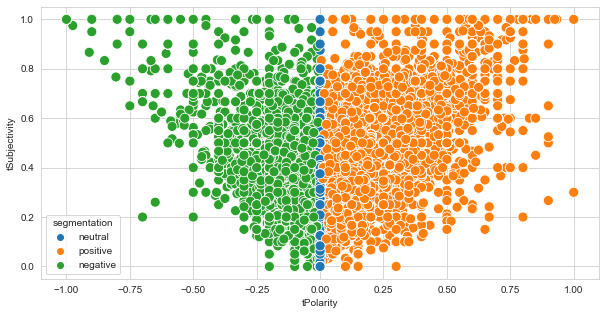

In [747]:

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=data, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

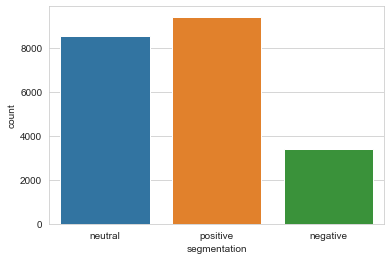

In [748]:
sns.countplot(data=data,x='segmentation')

In [749]:
positive = round(len(data[data.segmentation == 'positive'])/len(data)*100,1)
negative = round(len(data[data.segmentation == 'negative'])/len(data)*100,1)
neutral = round(len(data[data.segmentation == 'neutral'])/len(data)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['Good', 'Bad', 'Notsure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,Good,44.1
1,Bad,16.0
2,Notsure,39.9


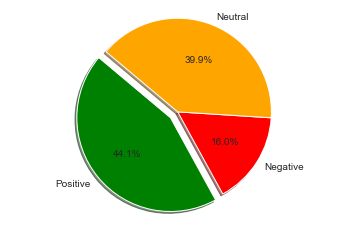

In [750]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['Green', 'Red', 'orange']
explode = (0.1, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## In accordance with the public's perceptions, 44.1% of people are favourable toward digital India, compared to only 16% who are unfavourable and the remaining who seem to be neutral.

# **4.TOPIC MODELLING**

In [751]:
all_words = [word for tweet in data['cleanedTweets'] for word in tweet]
tweet_lengths = [len(tokens) for tokens in data['cleanedTweets']]
vocab = sorted(list(set(all_words)))
print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

2272920 words total, with a vocabulary size of 209
Max tweet length is 285


In [752]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
def tokenize_text(df_text):
    wnl = WordNetLemmatizer()
    tokenized= [wnl.lemmatize(word) for word in df_text.split()]
    return tokenized

In [753]:
data['cleanedTweets']=data['cleanedTweets'].apply(tokenize_text)
data.head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,"[afpoh, startup, of, visionary, is, the, digital, companion, and, digital, gateway, for, indian, farmer, httpstcowerjajthcc, we, would, protect, you, from, hoax, like, ptlb]",0.0,0.00,neutral
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH","[do, forget, international, cabal, they, pushed, including, india, say, visionary]",0.0,0.00,neutral
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,"[india, drive, find, online, citizen, service, quicker, india, drive, search, engine, online, service, andaman, nicobar, central, government]",0.0,0.25,neutral


In [754]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(df_text):
    wnl = WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(word) for word in df_text]
    return lemmatized

In [755]:
data['cleanedTweets']=data['cleanedTweets'].apply(lemmatize_text)
data.head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,AFPOH Startup Of Visionary @IMPraveenDalal Is The Digital Companion And Digital Gateway For Indian Farmers https://t.co/wERJajTHCc. We Would Protect You From Hoaxes Like #Covid19 And #GlobalWarming Too #DigitalIndia #IndiaTechade @_PTLB @HaarpDecoded @DisasterReliefs @AadhaarLies https://t.co/heQikFsV0x,"[afpoh, startup, of, visionary, is, the, digital, companion, and, digital, gateway, for, indian, farmer, httpstcowerjajthcc, we, would, protect, you, from, hoax, like, ptlb]",0.0,0.00,neutral
1,"Do not forget that international cabal and #GenocidalManiacs snatched away your liberties and #BodilyAutonomy from you by using the #Covid19 hoax. They pushed #DeathShots killing millions globally, including in India, says Visionary @IMPraveenDalal. #DigitalIndia #IndiaTechade https://t.co/f9zXWgmJnH","[do, forget, international, cabal, they, pushed, including, india, say, visionary]",0.0,0.00,neutral
2,INDIA DRIVE: Find Online Citizen Services QUICKER \n\nINDIA Drive is your SEARCH ENGINE for Online Services from Andaman and Nicobar and Central Governments.\n\nhttps://t.co/uEfYlyw8Gi\n\nhttps://t.co/6DVK6dMpG2\n\n #SouthAndaman #DigitalIndia #PortBlair,"[india, drive, find, online, citizen, service, quicker, india, drive, search, engine, online, service, andaman, nicobar, central, government]",0.0,0.25,neutral


In [756]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in data['cleanedTweets'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('india', 6829),
 ('digital', 5057),
 ('service', 2896),
 ('amp', 2616),
 ('the', 2102),
 ('we', 1998),
 ('from', 1909),
 ('i', 1841),
 ('online', 1762),
 ('app', 1569),
 ('a', 1474),
 ('this', 1438),
 ('it', 1382),
 ('people', 1256),
 ('u', 1197),
 ('get', 1194),
 ('of', 1174),
 ('day', 1145),
 ('state', 1119),
 ('rt', 1092),
 ('indian', 1073),
 ('govt', 1071),
 ('time', 1059),
 ('payment', 1054),
 ('bank', 1050),
 ('now', 1040),
 ('would', 967),
 ('one', 949),
 ('new', 932),
 ('and', 911)]

In [757]:
most_common_count = [x[1] for x in word_freq.most_common(30)]

most_common_word = [x[0] for x in word_freq.most_common(30)]

top_30_dictionary = dict(zip(most_common_word, most_common_count))

### Word Cloud

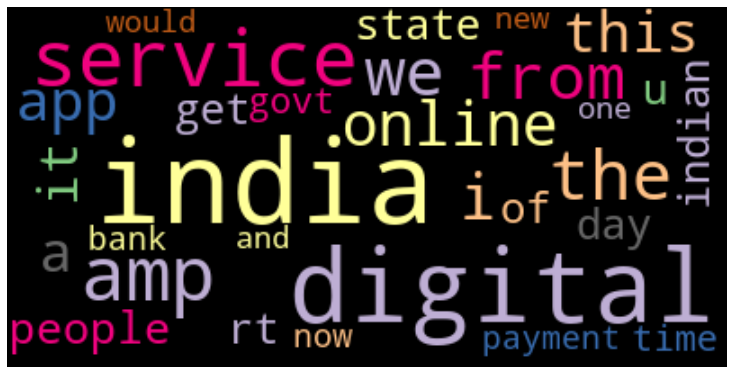

In [758]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from wordcloud import WordCloud

wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(top_30_dictionary)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Creating a Bag Of Words

In [759]:
from gensim.corpora import Dictionary

text_dict = Dictionary(data.cleanedTweets)

text_dict.token2id

{'afpoh': 0,
 'and': 1,
 'companion': 2,
 'digital': 3,
 'farmer': 4,
 'for': 5,
 'from': 6,
 'gateway': 7,
 'hoax': 8,
 'httpstcowerjajthcc': 9,
 'indian': 10,
 'is': 11,
 'like': 12,
 'of': 13,
 'protect': 14,
 'ptlb': 15,
 'startup': 16,
 'the': 17,
 'visionary': 18,
 'we': 19,
 'would': 20,
 'you': 21,
 'cabal': 22,
 'do': 23,
 'forget': 24,
 'including': 25,
 'india': 26,
 'international': 27,
 'pushed': 28,
 'say': 29,
 'they': 30,
 'andaman': 31,
 'central': 32,
 'citizen': 33,
 'drive': 34,
 'engine': 35,
 'find': 36,
 'government': 37,
 'nicobar': 38,
 'online': 39,
 'quicker': 40,
 'search': 41,
 'service': 42,
 'astro': 43,
 'competition': 44,
 'first': 45,
 'image': 46,
 'james': 47,
 'national': 48,
 'podcast': 49,
 'space': 50,
 'telescope': 51,
 'universe': 52,
 'unseen': 53,
 'video': 54,
 'webb': 55,
 'amount': 56,
 'billed': 57,
 'dispensing': 58,
 'exact': 59,
 'filled': 60,
 'fuelled': 61,
 'get': 62,
 'integrated': 63,
 'machine': 64,
 'payment': 65,
 'po': 66,
 's

In [760]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in data['cleanedTweets']]

### Fitting the LDA Model

In [761]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.046*"india" + 0.036*"service" + 0.026*"app" + 0.025*"digital" + 0.021*"rt" + 0.019*"state" + 0.014*"this" + 0.011*"umang" + 0.011*"government" + 0.010*"amp"'),
 (1,
  '0.027*"digital" + 0.023*"india" + 0.013*"i" + 0.009*"payment" + 0.009*"bank" + 0.007*"day" + 0.007*"one" + 0.007*"transaction" + 0.006*"u" + 0.006*"amp"'),
 (2,
  '0.034*"we" + 0.026*"with" + 0.022*"plus" + 0.019*"india" + 0.014*"group" + 0.014*"of" + 0.013*"are" + 0.013*"based" + 0.013*"company" + 0.011*"govt"'),
 (3,
  '0.035*"india" + 0.029*"digital" + 0.020*"the" + 0.017*"amp" + 0.014*"ad" + 0.013*"from" + 0.011*"a" + 0.010*"to" + 0.010*"and" + 0.010*"our"'),
 (4,
  '0.027*"digital" + 0.015*"vle" + 0.015*"csc" + 0.008*"million" + 0.007*"certificate" + 0.007*"marketing" + 0.007*"raised" + 0.007*"story" + 0.006*"district" + 0.005*"easy"')]

### PyLDAvis

In [763]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
tweets_bow = [text_dict.doc2bow(tweet) for tweet in data['cleanedTweets'][:1000]]
lda_viz = gensimvis.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
lda_viz

C:\Users\slgko\anaconda3\envs\blind\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.031953 -0.092171       1        1  26.415729
0      0.196068 -0.190294       2        1  23.149180
3     -0.133551 -0.059753       3        1  20.712505
2     -0.234911  0.099136       4        1  16.594224
4      0.204348  0.243082       5        1  13.128362, topic_info=         Term        Freq       Total Category  logprob  loglift
42    service  124.000000  124.000000  Default  30.0000  30.0000
19         we   95.000000   95.000000  Default  29.0000  29.0000
70       with   60.000000   60.000000  Default  28.0000  28.0000
147       app   91.000000   91.000000  Default  27.0000  27.0000
872     state   61.000000   61.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
391         a    6.227060   59.859275   Topic5  -5.6674  -0.2327
175      help    5.700424   23.368783   Topic5  -5.7557   0.6195
343       now    5.936750   46.884340   Topic5  -5.7151  -0.0361
1206    based    5.726184   34.271849   Topic5  -5.7512   0.2411
71        amp    5.597993  112.903267   Topic5  -5.7739  -0.9737

[308 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
391       1  0.033412       a
391       2  0.050118       a
391       3  0.517881       a
391       4  0.283999       a
391       5  0.100235       a
...     ...       ...     ...
440       3  0.147565    year
440       5  0.147565    year
2408      2  0.962101  yojana
919       3  1.002568    your
412       5  1.054134   youth

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])